# Sample-Oriented Task-Driven Visualizations: 
## Allowing Users to Make Better, More Confident Decisions

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.colors as col
import matplotlib.cm as cm


In [2]:
%matplotlib notebook
#Enable interactive plots

In [3]:
# Define the data
# Use the following data for this assignment:
np.random.seed(12345)

df = pd.DataFrame([
    np.random.normal(32000, 200000, 3650),
    np.random.normal(43000, 100000, 3650),
    np.random.normal(43500, 140000, 3650),
    np.random.normal(48000, 70000, 3650)
],
                  index=[1992, 1993, 1994, 1995])


In [4]:
# Calculate the means and standard deviations
df_mean = df.mean(axis = 1)
df_std = df.std(axis = 1)
n = df.shape[1]
n

3650

In [5]:
# Computer the errorbar for the plots|
ci = df_std/np.sqrt(n)*st.norm.ppf(1-0.05/2)
ci

1992    6508.778367
1993    3192.195655
1994    4553.818608
1995    2263.810146
dtype: float64

<IPython.core.display.Javascript object>


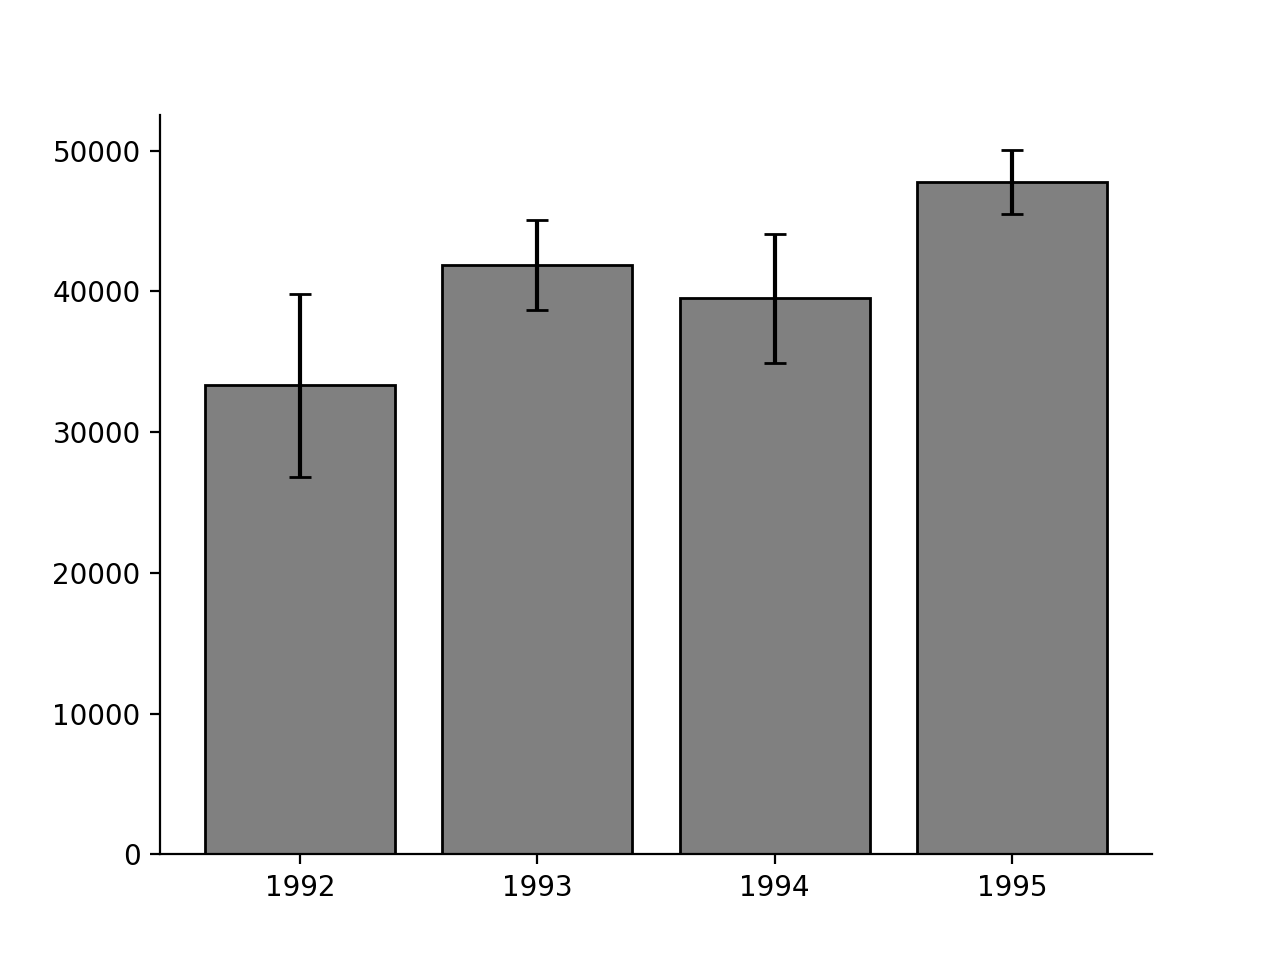

In [6]:
# Preview the plots 

plt.figure()
plt.bar(df.index,df_mean,yerr=ci,capsize = 4,color='grey',edgecolor='black')
plt.xticks(df.index)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [35]:
# start to introduce the horizontal line y
y = 42000 #default


In [36]:
# Calculate the confidence interval for each column
c_interval = [st.norm.interval(alpha = 0.95,loc = mu,scale = sigma) for mu,sigma in zip(df_mean,df_std/np.sqrt(n))]
c_interval

[(26803.329108101625, 39820.885842987045),
 (38669.66388580649, 45054.05519634029),
 (34939.48633333383, 44047.12354946397),
 (45479.74082376381, 50007.36111477046)]

In [37]:
# Evaluate the proportion of data > y
def prop_above_y(y,c):
    if y < c[0]:
        return 1
    elif y> c[1]:
        return 0
    return (c[1]-y)/(c[1]-c[0])

In [38]:
prop_y = [prop_above_y(y,c) for c in c_interval]
prop_y

[0, 0.47836278319928677, 0.2247699925770427, 1]

In [39]:
#df.loc[1995]

In [40]:
# Set up colormap
cc = ['seismic', 'bwr', 'coolwarm']

In [41]:
cmap = cm.get_cmap(cc[2]) #Get the colormap
norm = col.Normalize(vmin = 0,vmax = 1.0) #Normalize the value into [0,1]
cpick = cm.ScalarMappable(cmap=cmap,norm=norm)
cpick.set_array([]) #To make sure colorbar will work

<IPython.core.display.Javascript object>


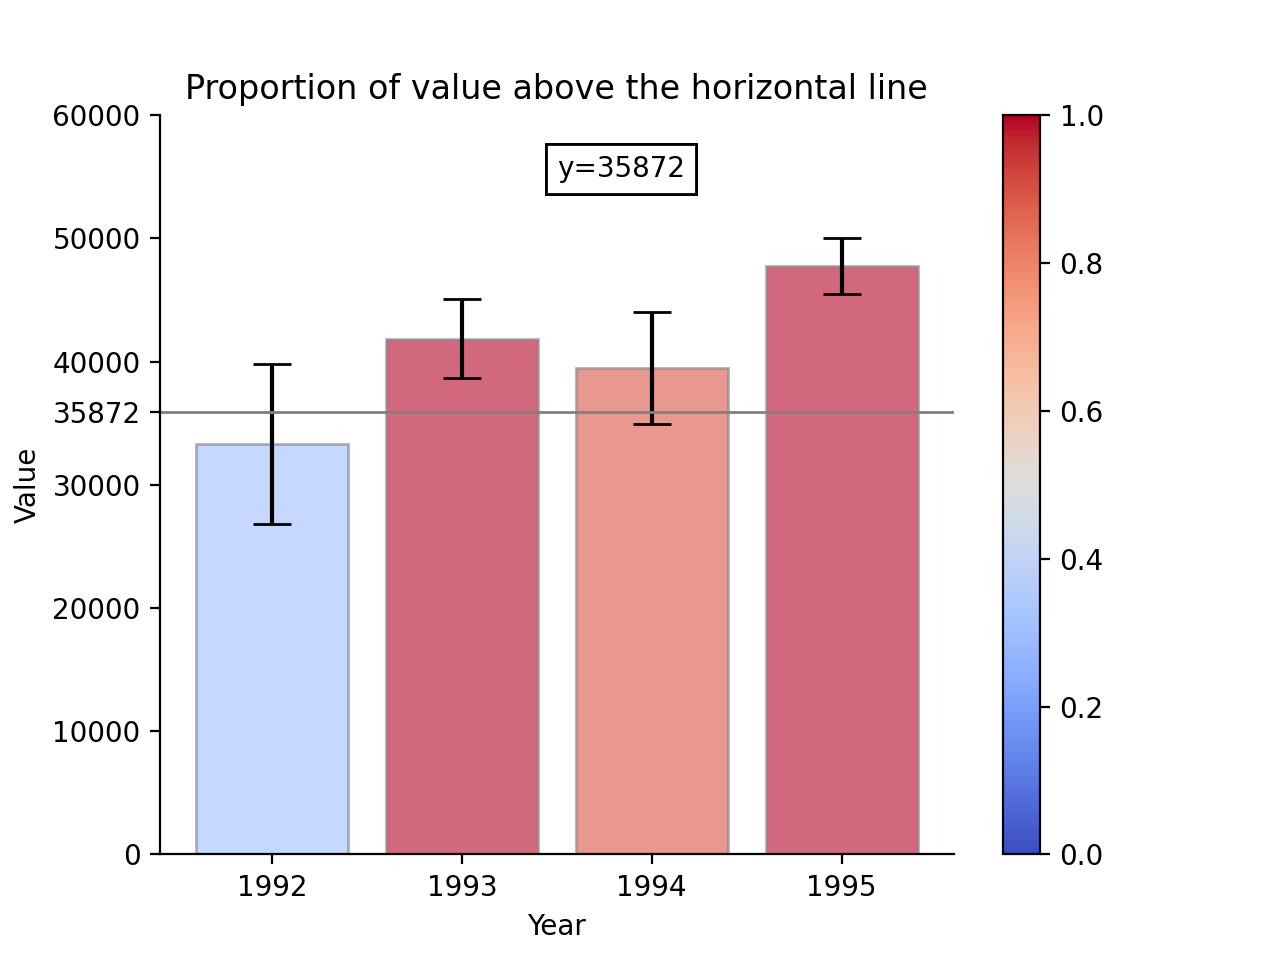

In [66]:
# Try to plot with colorbar
plt.figure()
b = plt.bar(df.index,df_mean,yerr=ci,color = cpick.to_rgba(prop_y),edgecolor='gray',alpha=0.6,capsize=7)
cbar = plt.colorbar(cpick,orientation='vertical')
#Add the horizontal line
h = plt.axhline(y,color='gray',linewidth = 1,linestyle='-')

plt.xticks(df.index)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Proportion of value above the horizontal line')
#Remove the frame
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#Show the value of y
y_t_f = plt.gca().get_yticks()
y_t_all = np.append(y_t_f,y)
ax.set_yticks(y_t_all)
#Show y value on the top
y_text = plt.text(1993.5,55000,f'y={y}', bbox = dict(fc='white',ec='k'))

# Now let's make the y value user defined
def onclick(event):
    y = event.ydata
    h.set_ydata(event.ydata)
    y_all = np.append(y_t_f,y)
    plt.gca().set_yticks(y_all)
    y_text = plt.text(1993.5,55000,f'y={int(y)}',bbox=dict(fc='white',ec='k'))
    #Recalculate the proportion
    prop_y = [prop_above_y(y,c) for c in c_interval]
    #Update the figure
    for i in range(len(df)):
        b[i].set_color(cpick.to_rgba(prop_y[i]))
        b[i].set_edgecolor('gray')
        
    
   

plt.gcf().canvas.mpl_connect('button_press_event',onclick)
plt.show()






In [67]:
pwd   

'C:\\Users\\yuxue'